In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [18]:
from AudioNet import *
from torchsummary import summary

In [19]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(DEVICE)
ROOT_DIR = '/beegfs/bva212/fma_small_cqt/'
PATH_FILE = 'checksums'
BATCH_SIZE = 32
VAL_SPLIT = 0.2
TRANSFORM_PROB  = 0.5
SR = 22050
MODEL_SAVE_PATH = '/beegfs/sc6957/audionet_jigsaw_model.pth'

cuda:0


In [20]:
REDUCE_TWO_CLASS = True

In [36]:
start = time.time()
audionet = AudioNet(DEVICE, ROOT_DIR, PATH_FILE, SR, BATCH_SIZE, VAL_SPLIT, TRANSFORM_PROB, REDUCE_TWO_CLASS)
print(f'time for instantiating audio net object - {time.time() - start}')

Getting Train & Validation Datasets
Excluding these 3 files - ['098/098567.mp3_cqt.npy', '098/098565.mp3_cqt.npy', '098/098569.mp3_cqt.npy']
There are a total of 7836 music files in the root directory
# Training samples: 6268 	 # Validation samples: 1567
	 --Done
Creating Train & Validation Dataloaders
Length of Train dataloader: 196 	 Validation dataloader: 49
	 --Done
Instantiating Audio Net Model
	 --Done
Init actions done
time for instantiating audio net object - 3.4740734100341797


In [37]:
audionet.model

DataParallel(
  (module): l3net_separable(
    (conv_layers): Sequential(
      (0): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), groups=3)
      (1): Conv2d(3, 64, kernel_size=(1, 1), stride=(1, 1))
      (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): ReLU(inplace=True)
      (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (6): ReLU(inplace=True)
      (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
      (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (10): ReLU(inplace=True)
      (11): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
      (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (13): ReLU(inplace=True)
      (14): MaxPool2d(kernel_size=2

In [38]:
#!pip list

In [39]:
# summary(audionet, (3, 84, 135))

In [ ]:
audionet.train(num_epochs= 30, learning_rate=1e-4, print_every=4, verbose=True)

Instantiating Optimzer, Loss Criterion, Scheduler
	 --Done
Training started
Epoch 1/30
----------
train Loss: 0.7267 Acc: 0.521296
valid Loss: 0.7054 Acc: 0.5137

Epoch 5/30id   Iteration 49/4996
----------


In [78]:
start = time.time()
batch = next(iter(audionet.dataloaders['train']))
print(f'time for fetching one batch - {time.time() - start}')

time for fetching one batch - 0.921044111251831


In [79]:
batch[0].shape,batch[1].shape

(torch.Size([32, 3, 84, 135]), torch.Size([32]))

In [68]:
audionet.train(num_epochs= 80, learning_rate=1e-4, print_every=4, verbose=True)

Instantiating Optimzer, Loss Criterion, Scheduler
	 --Done
Training started
Epoch 1/80
----------
train Loss: 0.6030 Acc: 0.622596
valid Loss: 0.5932 Acc: 0.6075

Epoch     3: reducing learning rate of group 0 to 1.0000e-05.
Epoch 5/80
----------
train Loss: 0.5847 Acc: 0.649596
valid Loss: 0.5861 Acc: 0.6133

Epoch 9/80id   Iteration 49/4996
----------
train Loss: 0.5737 Acc: 0.663596
valid Loss: 0.5864 Acc: 0.6375

Epoch     9: reducing learning rate of group 0 to 1.0000e-06.
Epoch 13/80d   Iteration 49/4996
----------
train Loss: 0.5717 Acc: 0.671396
valid Loss: 0.6142 Acc: 0.5960
Epoch    12: reducing learning rate of group 0 to 1.0000e-07.

Epoch 17/80d   Iteration 49/4996
----------
train Loss: 0.5628 Acc: 0.677196
valid Loss: 0.6081 Acc: 0.5941

Epoch    17: reducing learning rate of group 0 to 1.0000e-08.
Epoch 21/80d   Iteration 49/4996
----------
train Loss: 0.5745 Acc: 0.663596
valid Loss: 0.5964 Acc: 0.6037

Epoch 25/80d   Iteration 49/4996
----------
train Loss: 0.5738 Acc

KeyboardInterrupt: 

Instantiating Optimzer, Loss Criterion, Scheduler
	 --Done
Training started
Epoch 1/20
----------
train Loss: 0.7240 Acc: 0.545096
valid Loss: 0.6423 Acc: 0.6063

Epoch 3/20id   Iteration 49/4996
----------
train Loss: 0.6087 Acc: 0.623896
valid Loss: 0.5879 Acc: 0.6203

Epoch 5/20id   Iteration 49/4996
----------
train Loss: 0.6019 Acc: 0.617996
valid Loss: 0.5991 Acc: 0.6101

Epoch     5: reducing learning rate of group 0 to 1.0000e-05.
Epoch 7/20
----------
train Loss: 0.5851 Acc: 0.637796
valid Loss: 0.5954 Acc: 0.6133

Epoch 9/20id   Iteration 49/4996
----------
train Loss: 0.5805 Acc: 0.645296
valid Loss: 0.5918 Acc: 0.6107
Epoch     8: reducing learning rate of group 0 to 1.0000e-06.

Epoch 11/20d   Iteration 49/4996
----------
train Loss: 0.5846 Acc: 0.647196
valid Loss: 0.5903 Acc: 0.6031

Epoch 13/20d   Iteration 49/4996
----------
train Loss: 0.5756 Acc: 0.655796
valid Loss: 0.5699 Acc: 0.6356

Epoch 15/20d   Iteration 49/4996
----------
train Loss: 0.5885 Acc: 0.643996
vali

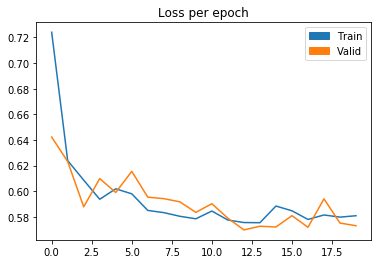

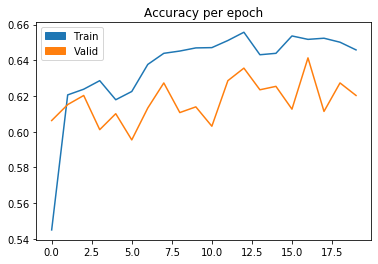

In [67]:
audionet.train(num_epochs= 20, learning_rate=1e-4, print_every=2, verbose=True)

In [13]:
torch.save(audionet.model.state_dict(), MODEL_SAVE_PATH)

In [ ]:
import scipy, IPython.display as ipd

In [ ]:
ipd.Audio('/beegfs/bva212/fma_small_cqt/000/000002.mp3_cqt.npy', rate=22050)

In [ ]:
waveform, fs = librosa.load('/beegfs/bva212/fma_small/000/000002.mp3')
soundnet.cqt_transform(waveform)

In [ ]:
from torch.utils.tensorboard import SummaryWriter
import numpy as np

writer = SummaryWriter()

for n_iter in range(100):
    writer.add_scalar('Loss/train', np.random.random(), n_iter)
    writer.add_scalar('Loss/test', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/train', np.random.random(), n_iter)
    writer.add_scalar('Accuracy/test', np.random.random(), n_iter)
writer.close()